# Week 10 Independent lab

**Course Information:**  Graduate Introduction to Python, BGEN 632

**Notebook Author Name:** Leo Valladares

**Submission Date:**  2025/05/06

**Description:** This Jupyter notebook has activities related to the independent lab 10.

### Import Modules

In [1]:
# load modules
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# for displaying the tree
import graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus

### Set Working Directory


In [2]:
os.chdir("C:/Users/leova/OneDrive/BGEN 632/week10labs/data")

### Access Data

In [ ]:
# load data
hospital_data = pd.read_table("calihospital.txt", sep = '\t')

hospital_data.head()

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


In [4]:
numerical_df = hospital_data[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']]

numerical_df.corr()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
NoFTE,1.000000,0.903827,0.938051,0.880295,0.896387,-0.072314,0.881333
NetPatRev,0.903827,1.000000,0.979109,0.960232,0.998765,0.220149,0.887727
InOperExp,0.938051,0.979109,1.000000,0.935863,0.979817,0.071781,0.925521
OutOperExp,0.880295,0.960232,0.935863,1.000000,0.955239,0.056218,0.826892
OperRev,0.896387,0.998765,0.979817,0.955239,1.000000,0.234270,0.890018
OperInc,-0.072314,0.220149,0.071781,0.056218,0.234270,1.000000,0.041857
AvlBeds,0.881333,0.887727,0.925521,0.826892,0.890018,0.041857,1.000000


## Create Decision Trees

Using `operating income` as a target variable, create a tree.

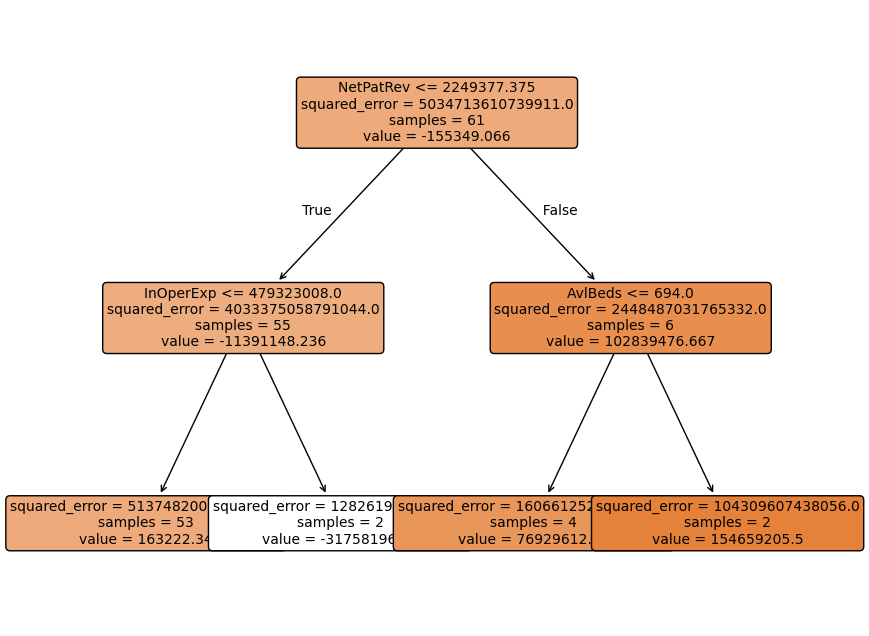

In [7]:
# subset numerical variables
hosp_sub_1 = (hospital_data
             .filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'AvlBeds'])
            )

# subset categorical variables 
hosp_dummy = (hospital_data
              .filter(['TypeControl', 'Teaching', 'DonorType'])
             )

# convert categorical variable into dummy/indicator variables 
dummies = pd.get_dummies(hosp_dummy, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_1 = pd.merge(hosp_sub_1, dummies, left_index=True, right_index=True)

# create the tree - note this is a REGRESSION tree
tree_1 = tree.DecisionTreeRegressor(max_depth=2).fit(tree_data_1, hospital_data['OperInc'])

# create labels for plot
col_names1 = list(tree_data_1.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_1, feature_names=col_names1, filled=True, rounded=True, fontsize=10)
plt.show()

Using `Operating Income` as target, the NetPatRev is the most important predictor for the first split of the regression tree. At the second level, the tree uses InOperExp and AvlBeds to contenue separate the data.


#### Using `operating revenue` as a target variable, create a tree.

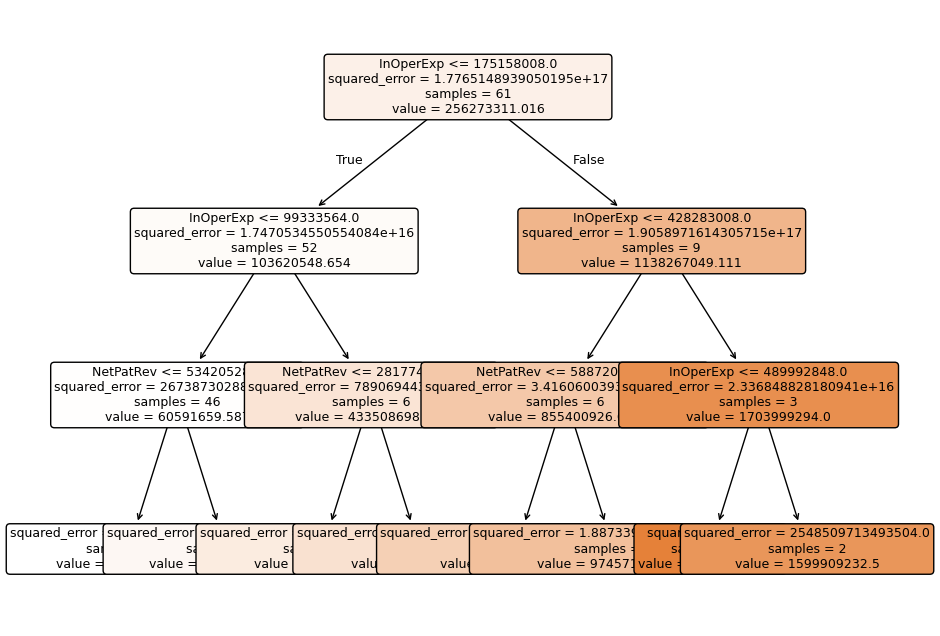

In [8]:
# subset numerical variables
hosp_sub_2 = (hospital_data
             .filter(['NoFTE', 'InOperExp', 'OutOperExp', 'AvlBeds'])
            )


# merge numerical and dummy-coded categorical variables
tree_data_2 = pd.merge(hosp_sub_2, dummies, left_index=True, right_index=True)

# create the tree - note this is a REGRESSION tree
tree_2 = tree.DecisionTreeRegressor(max_depth=3).fit(tree_data_2, hospital_data['OperRev'])

# create labels for plot
col_names2 = list(tree_data_1.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_2, feature_names=col_names2, filled=True, rounded=True, fontsize=9)
plt.show()

Using `Operation Revenue` as the target, the tree identifies InOperExp, as the most important predictor; this variable is used to separate in the first and second levels. It looks like the more money needed to attend patients, the more the Operating revenue. 

#### Using `TypeControl` as a target variable, create a tree.

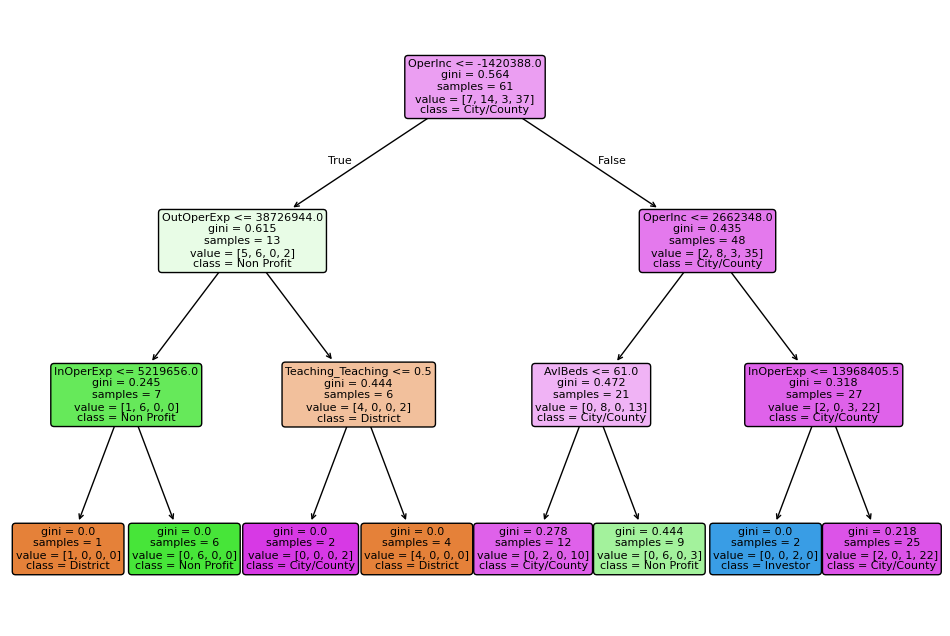

In [9]:
# subset numerical variables
hosp_sub_3 = (hospital_data
.filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperInc', 'OperRev', 'AvlBeds'])
)

# subset categorical variables other than TypeControl
hosp_dummy2 = (hospital_data
               .filter(['Teaching', 'DonorType'])
              )

# convert categorical to dummy 
dummies2 = pd.get_dummies(hosp_dummy2,drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_3 = pd.merge(hosp_sub_3, dummies2, left_index=True, right_index=True)

# create tree - note this is a CLASSIFICATION tree
tree_3 = tree.DecisionTreeClassifier(max_depth=3).fit(tree_data_3, hospital_data['TypeControl'])

# create labels for plot
col_names3 = list(tree_data_3.columns.values)
classnames1 = list(hospital_data.TypeControl.unique())

# create plot
plt.figure(figsize=(12,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_3, feature_names=col_names3, class_names=classnames1, filled=True, rounded=True, fontsize=8)
plt.show()

Using `TypeControl` as the target, the clasification tree select OperInc as the most impotant variable. It support the clasification of the hospital between Non profit and city/County. At the next level, OutOperExp and OperInc contenue the clasification. Less Operating income is associted to a Non Profit Hospital at the first level.



#### Using `DonorType` as a target variable, create a tree

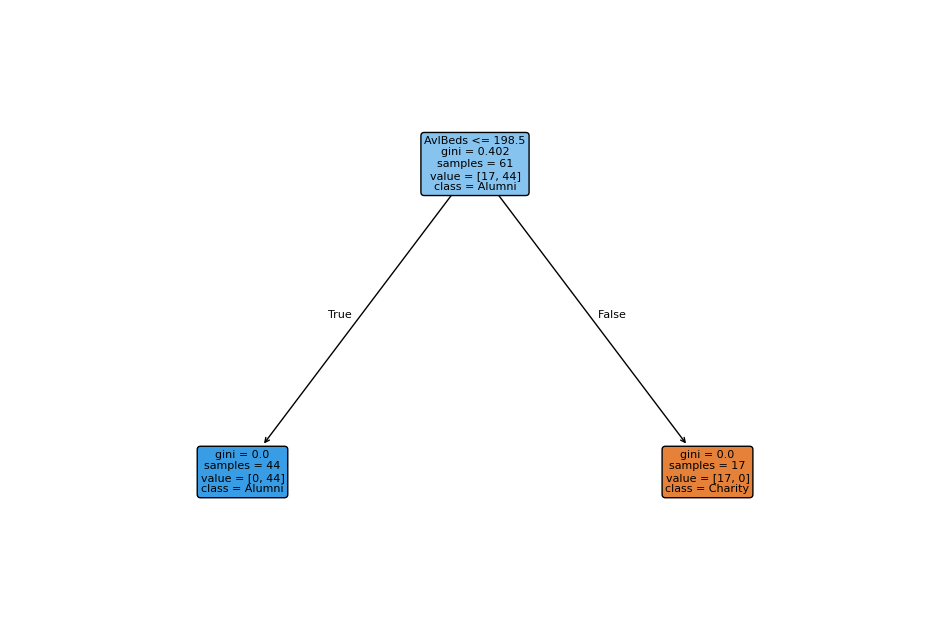

In [10]:
# subset numerical data
hosp_sub_4 = (hospital_data
             .filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperInc', 'OperRev', 'AvlBeds'])
            )

# subset categorical variables other than DonorType
hosp_dummy3 = (hospital_data
               .filter(['Teaching', 'TypeControl'])
              )

# convert categorical variable into dummy/indicator variables
dummies3 = pd.get_dummies(hosp_dummy3, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_4 = pd.merge(hosp_sub_4, dummies3, left_index=True, right_index=True)

# create tree - note this is a CLASSIFICATION tree
tree_4 = tree.DecisionTreeClassifier(max_depth=3).fit(tree_data_4, hospital_data['DonorType'])

# create labels for plot
col_names4 = list(tree_data_4.columns.values)
classnames2 = list(hospital_data.DonorType.unique())

# create plot
plt.figure(figsize=(12,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_4, feature_names=col_names4, class_names=classnames2, filled=True, rounded=True, fontsize=8)
plt.show()

According to this classification tree, The only relevan factor to predicting `DonorType` is the number of available beds. About less than 200 beds is clasiffy as Alumni and more than 200 as Charity. 